202007C bloom timing

In [1]:
import datetime as dt
import glob
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd
from pathlib import Path
import xarray as xr

from salishsea_tools import places

%matplotlib inline

In [2]:
drop_vars = [
    "time_centered",
    "time_centered_bounds",
    "time_counter_bounds",
    "nav_lat",
    "bounds_lat",
    "nav_lon",
    "bounds_lon",
    "area",
    "deptht_bounds",
]
chunks = {
    "time_counter": 1,
    "deptht": 1,
}

In [9]:
def prep_timeseries(dir_path, file_pattern, n_days): 
    ds_files = sorted(dir_path.glob(file_pattern))
    ds = xr.open_mfdataset(
        ds_files[:n_days],
        chunks=chunks,
        drop_variables=drop_vars,
    )
    timeseries = ds.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
    
    return timeseries

In [ ]:
def get_the_data(dir_path, year, numberdays):
    evenlessink = []
    for filename in sorted(dir_path.glob(f"SalishSea_1d_{year}0[23]*ptrc_T*.nc"))[:numberdays]:
        data = xr.load_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
  
    timeseries = xr.concat(evenlessink, dim='time_counter')
    return timeseries

In [ ]:
def get_the_data_numpy(dir_path, year):
    timeseries = {'diatoms': np.zeros(61),
                 'nitrate': np.zeros(61)}
    for it, filename in enumerate(sorted(dir_path.glob(f"SalishSea_1d_{year}0[23]*ptrc_T*.nc"))):
        data = xr.open_dataset(filename)
        timeseries['diatoms'][it] = data['diatoms'].isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )[0]
        timeseries['nitrate'][it] = data['nitrate'].isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )[0]
        data.close()

    return timeseries

In [8]:
def get_the_data_nc(dir_path, year):
    timeseries = {'diatoms': np.zeros(61),
                 'nitrate': np.zeros(61)}
    for it, filename in enumerate(sorted(dir_path.glob(f"SalishSea_1d_{year}0[23]*ptrc_T*.nc"))):
        data = xr.open_dataset(filename)
        timeseries['diatoms'][it] = data['diatoms'][0, 1, places.PLACES['S3']['NEMO grid ji'][0], 
                             places.PLACES['S3']['NEMO grid ji'][1]]
        timeseries['nitrate'][it] = data['nitrate'][0, 1, places.PLACES['S3']['NEMO grid ji'][0], 
                             places.PLACES['S3']['NEMO grid ji'][1]]
        data.close()

    return timeseries

In [ ]:
def get_sockeye_data(year):
    evenlessink = []
    thestring = f'/data/sallen/results/MEOPAR/202007/{directory}/SalishSea_1d_*ptrc_T*{year}02*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()
    thestring = f'/data/sallen/results/MEOPAR/202007/{directory}/SalishSea_1d_*ptrc_T*{year}03*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()    

    timeseries = xr.concat(evenlessink, dim='time_counter')
    return timeseries

In [ ]:
def get_the_data_H201812(year):
    evenlessink = []
    thestring = f'/results/SalishSea/nowcast-green.201812/*/SalishSea_1d_{year}02*ptrc_T*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()
    thestring = f'/results/SalishSea/nowcast-green.201812/*/SalishSea_1d_{year}03*ptrc_T*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()    

    timeseries = xr.concat(evenlessink, dim='time_counter')
    return timeseries

In [11]:
directory = '202007C'
dir_path = Path(f"/data/sallen/results/MEOPAR/202007/{directory}")
year = 2015
months_regex = '0[23]'
file_pattern = f"SalishSea_1d_{year}{months_regex}*ptrc_T*.nc"
timeseries2015 = prep_timeseries(dir_path, file_pattern, -1)

In [12]:
timeseries2015.load(scheduler='processes', num_workers=4)

<xarray.Dataset>
Dimensions:                       (time_counter: 58)
Coordinates:
    deptht                        float32 1.5
  * time_counter                  (time_counter) datetime64[ns] 2015-02-01T12...
Data variables:
    nitrate                       (time_counter) float32 19.3 20.0 ... 12.1
    ammonium                      (time_counter) float32 0.9494 0.9065 ... 1.269
    silicon                       (time_counter) float32 46.97 46.81 ... 22.37
    diatoms                       (time_counter) float32 0.07782 ... 3.863
    flagellates                   (time_counter) float32 0.4594 ... 0.1028
    ciliates                      (time_counter) float32 0.3708 ... 0.4184
    microzooplankton              (time_counter) float32 0.4098 ... 0.8835
    dissolved_organic_nitrogen    (time_counter) float32 0.5246 0.4486 ... 2.268
    particulate_organic_nitrogen  (time_counter) float32 0.02096 ... 0.3674
    biogenic_silicon              (time_counter) float32 0.002804 ... 0.4415
    mesozooplankton               (time_counter) float32 0.843 0.7635 ... 1.697
Attributes:
    name:         SalishSea_1d_20150201_20150205
    description:  biogeochemical variables
    title:        biogeochemical variables
    Conventions:  CF-1.6
    timeStamp:    2020-Dec-18 14:45:54 GMT
    uuid:         8ad82a49-0e75-4554-b359-7906f5a458df

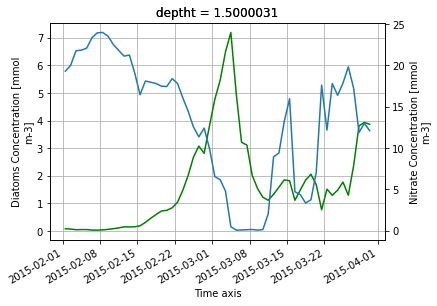

In [13]:
fig, ax = plt.subplots(1, 1)
timeseries2015.diatoms.plot(ax=ax, color='g')
ax2 = ax.twinx()
timeseries2015.nitrate.plot(ax=ax2);
ax.grid()

In [7]:
print(timeseries2015.diatoms[28:38])
print(timeseries2015.time_counter[31])

<xarray.DataArray 'diatoms' (time_counter: 10)>
array([4.7673674, 5.459994 , 6.489537 , 7.1904793, 4.9952154, 3.2101994,
       3.1111789, 2.0152469, 1.5355996, 1.2158096], dtype=float32)
Coordinates:
    deptht        float32 1.5
  * time_counter  (time_counter) datetime64[ns] 2015-03-01T12:00:00 ... 2015-...
Attributes:
    standard_name:       mole_concentration_of_diatoms_expressed_as_nitrogen_...
    long_name:           Diatoms Concentration
    units:               mmol m-3
    online_operation:    average
    interval_operation:  40 s
    interval_write:      1 d
    cell_methods:        time: mean (interval: 40 s)
    cell_measures:       area: area
<xarray.DataArray 'time_counter' ()>
array('2015-03-04T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    deptht        float32 1.5
    time_counter  datetime64[ns] 2015-03-04T12:00:00
Attributes:
    axis:           T
    standard_name:  time
    long_name:      Time axis
    time_origin:    1900-01-01 00:00:00
    boun

In [15]:
directory = 'nowcast-green.201812'
dir_path = Path(f"/results/SalishSea/{directory}")
month_regex = '0[23]'
file_pattern = f"*/SalishSea_1d_{year}{months_regex}*ptrc_T*.nc"
old2015 = prep_timeseries(dir_path, file_pattern, -1)

In [16]:
old2015.load(scheduler='processes', num_workers=4)

<xarray.Dataset>
Dimensions:                       (time_counter: 58)
Coordinates:
    deptht                        float32 1.5
  * time_counter                  (time_counter) datetime64[ns] 2015-02-01T12...
Data variables:
    nitrate                       (time_counter) float32 18.18 19.01 ... 4.291
    ammonium                      (time_counter) float32 1.106 1.066 ... 0.708
    silicon                       (time_counter) float32 49.77 49.85 ... 34.45
    diatoms                       (time_counter) float32 0.05783 ... 4.521
    flagellates                   (time_counter) float32 0.7627 0.7334 ... 0.659
    ciliates                      (time_counter) float32 0.3809 0.32 ... 0.4831
    microzooplankton              (time_counter) float32 0.5162 0.452 ... 1.152
    dissolved_organic_nitrogen    (time_counter) float32 0.6874 0.6018 ... 2.52
    particulate_organic_nitrogen  (time_counter) float32 0.03406 ... 0.1839
    biogenic_silicon              (time_counter) float32 0.004866 ... 0.4344
    Fraser_tracer                 (time_counter) float32 0.6497 0.6905 ... 8.509
    mesozooplankton               (time_counter) float32 0.8191 0.7556 ... 1.722
Attributes:
    name:         SalishSea_1d_20150201_20150210
    description:  biogeochemical variables
    title:        biogeochemical variables
    Conventions:  CF-1.6
    timeStamp:    2018-Dec-28 19:25:24 GMT
    uuid:         8721df21-f52b-42bb-9ca5-f38cde292fd5

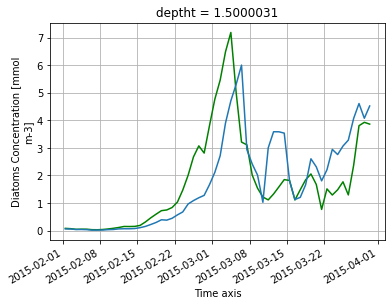

In [17]:
fig, ax = plt.subplots(1, 1)
timeseries2015.diatoms.plot(ax=ax, color='g')
old2015.diatoms.plot(ax=ax);
ax.grid()

In [18]:
df1 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20140804T234330Z_20150604T070614Z-clean.csv',
        skiprows=78, header=None,
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'))
df2 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20150604T070624Z_20160307T160206Z-clean.csv',
        skiprows=78, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC'))

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [19]:
df3 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20160307T160215Z_20161019T064047Z-clean.csv',
                 skiprows=78, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC'))

In [20]:
df4 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170217T003041Z_20170315T031911Z-clean.csv',
                 skiprows=66, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC', "Pitch (deg)", "Pitch QC Flag"  , "Roll (deg)", "Roll QC Flag"  , "True Heading (deg)", "True Heading QC Flag"))

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,9,11,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:
df5 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170315T031912Z_20170404T195130Z-clean.csv',
                 skiprows=66, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC', "Pitch (deg)", "Pitch QC Flag"  , "Roll (deg)", "Roll QC Flag"  , "True Heading (deg)", "True Heading QC Flag"))

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,5,7,9,11,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [22]:
df6 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170404T195131Z_20170426T173215Z-clean.csv',
                 skiprows=78, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC', "Pitch (deg)", "Pitch QC Flag"  , "Roll (deg)", "Roll QC Flag"  , "True Heading (deg)", "True Heading QC Flag"))

In [23]:
df = pd.concat([df1.drop(df1[df1.TimeUTC<'2015'].index),
                df2.drop(df2[df2.TimeUTC>'2018'].index),
                df3.drop(df3[df3.TimeUTC>'2018'].index),
                df4.drop(df4[df4.TimeUTC>'2018'].index),
                df5.drop(df5[df5.TimeUTC>'2018'].index),
                df6.drop(df6[df6.TimeUTC>'2018'].index),
               ], ignore_index=True)

In [24]:
dts = [dt.datetime(int(r[0:4]),int(r[5:7]),int(r[8:10]),int(r[11:13]),int(r[14:16]),int(r[17:19])) for r in df['TimeUTC']]
df = df.assign(dts=dts)
df['Lat'] = pd.to_numeric(df['Lat'],errors='coerce')
df['Lon'] = pd.to_numeric(df['Lon'],errors='coerce')

In [25]:
llon = places.PLACES['S3']['lon lat'][0] - .01
ulon = places.PLACES['S3']['lon lat'][0] + .01
llat = places.PLACES['S3']['lon lat'][1] - .01
ulat = places.PLACES['S3']['lon lat'][1] + .01
iidfnd = (df.Lon > llon) & (df.Lon < ulon) & (df.Lat > llat) & (df.Lat < ulat)

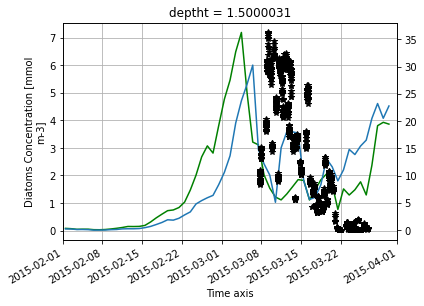

In [26]:
fig, ax = plt.subplots(1, 1)
timeseries2015.diatoms.plot(ax=ax, color='g')
old2015.diatoms.plot(ax=ax);
ax.grid()
ax2 = ax.twinx()
ax2.plot(df.loc[iidfnd, ['dts']], df.loc[iidfnd, ['Chlorophyll_ug']], 'k*')
ax.set_xlim((dt.datetime(2015, 2, 1),dt.datetime(2015, 4, 1)));

## 2016

In [27]:
directory = '202007C'
dir_path = Path(f"/data/sallen/results/MEOPAR/202007/{directory}")
year = 2016
months_regex = '0[34]'
file_pattern = f"SalishSea_1d_{year}{months_regex}*ptrc_T*.nc"
timeseries2016 = prep_timeseries(dir_path, file_pattern, -1)

In [28]:
timeseries2016.load(scheduler='processes', num_workers=4);

In [29]:
directory = 'nowcast-green.201812'
dir_path = Path(f"/results/SalishSea/{directory}")
month_regex = '0[34]'
file_pattern = f"*/SalishSea_1d_{year}{months_regex}*ptrc_T*.nc"
old2016 = prep_timeseries(dir_path, file_pattern, -1)

In [30]:
old2016.load(scheduler='processes', num_workers=4);

In [32]:
directory = '202007C/old'
dir_path = Path(f"/data/sallen/results/MEOPAR/202007/{directory}")
year = 2016
months_regex = '0[34]'
file_pattern = f"SalishSea_1d_{year}{months_regex}*ptrc_T*.nc"
wrongsink2016 = prep_timeseries(dir_path, file_pattern, -1)

In [33]:
wrongsink2016.load(scheduler='processes', num_workers=4);

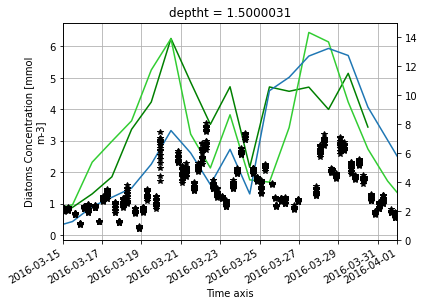

In [35]:
fig, ax = plt.subplots(1, 1)
timeseries2016.diatoms.plot(ax=ax, color='g')
wrongsink2016.diatoms.plot(ax=ax, color='limegreen')
old2016.diatoms.plot(ax=ax);
ax.grid()
ax2 = ax.twinx()
ax2.plot(df.loc[iidfnd, ['dts']], df.loc[iidfnd, ['Chlorophyll_ug']], 'k*')
ax2.set_ylim(0, 15)
ax.set_xlim((dt.datetime(2016, 3, 15),dt.datetime(2016, 4, 1)));

## 2017 not run yet

In [ ]:
directory = 'ESS_2018_LF'
timeseries2017 = get_sockeye_data('2017')

In [ ]:
directory = 'ESS_2018'
old2017 = get_the_data('2017')

In [ ]:
fig, ax = plt.subplots(1, 1)
timeseries2017.diatoms.plot(ax=ax, color='g')
old2017.diatoms.plot(ax=ax);
ax.grid()
ax2 = ax.twinx()
ax2.plot(df.loc[iidfnd, ['dts']], df.loc[iidfnd, ['Chlorophyll_ug']], 'k*')
ax.set_xlim((dt.datetime(2017, 3, 1),dt.datetime(2017, 4, 30)));

In [ ]:
doug = nc.Dataset('timeseries2015_fordoug.nc')
doug